# Отчёт

Результаты кратко

**DTree** 

На предложенной тренировочной выборке дерево быстро достигает 100% точности. 17 листьев дают 100% точности на трэйне. Датасет 6 тыс объектов, но пень из двух листьев даёт 77% точности на трэйне. Нигде не достигаем 100% точности на тесте. Двигаться по impurity левее с целью увидеть 100% точности на тесте не имеет смысла - модель достигла 100% на тесте, объясняет всю тренировочную выборку. Нужна регуляризация, чтобы получить более сложную модель.

Такой регуляризацией, как оказалось может служить шум в данных. Добавлял пропуски в тестовую выборку, либо портил значения атрибутов - оба метода позволяют отодвинуть момент достижения 100% точности на обучающей выборке. Достигается 100% точности на тесте, но цена за это - сложная модель. Ещё одно преимущество добавления шума - учимся на обучающей выборке с шумом, а незашумлённая обучающая выборка может служить для валидации модели.

**Random Forest**  

Чистый bagging 
Большой размер bootstarp выборки (trees_cnt=10, bootstrap_size=5000) на нашем датасете не очень эффективен. Теряется идея голосования. 

Успех достижения 100% точности на тесте заключается в идее введения подпространств атрибутов для деревьев леса. Эта идея позволяет эффективно противостоять переобучению.

**Random Forest vs DTree**

Для того чтоб достигнуть 100% точности с DTree пришлось поработать с исходными данными - вносили шум. Идея подпространств для атрибутов, bootstrap позволяют Random Forest достигать 100% точности из коробки. 100% точность сохраняется на достаточно широком наборе параметров.

## TODO 

### DTree

1. getImpurity - небольшая неточность при вычислении Gini. Потерян множитель 2. Думаю, не критично, можно не править. Поправлю только для того, чтоб убедится, что график accuracy от maximum impurity качественно не изменится.
2. leaf_cnt - добавил метод для подсчёта листьев в дереве. Использую его для аннотации точек по maximum impurity
3. getValueSet - значение признака "?" - не  известно, пропуск. Не делаем по нему разбиение
4. makeRule - line: node= ...  Проверить, что удалось найти разбиение. Должно быть bestAttrIndex > 0. Проверил, исключение возможно, когда начинаешь добавлять много пропусков. Два объекта становятся не различимыми и разбиение не построить. Строим лист.

### Random Forest

описание алгоритма на [habr](https://habr.com/ru/companies/ods/articles/324402/)

5. добавить параметр d_l - каждое дерево ансамбля учится на подпространстве обучающей выборки. Для каждого дерева выбирается случайное подмножество признаков.
6. добавить параметр m - решающее правило строится на m признаках. В каждом узле для построения правила случайным образом выбираются m признаков из тех признаков, что есть в подпространстве дерева. m ещё один параметр для экспериментов - ограничусь рекомендациями "Рекомендуется в задачах классификации брать $\large m = \sqrt{n}$". n - количество признаков. В нашем случае 21 признак - m = 4.5 . Ну пусть будет 5. Тогда d_l имеет смысл смотреть допустим от 10

## Отчёт подробно

### DTree

#### Различные интервалы по impurity

График до правки TODO 1  
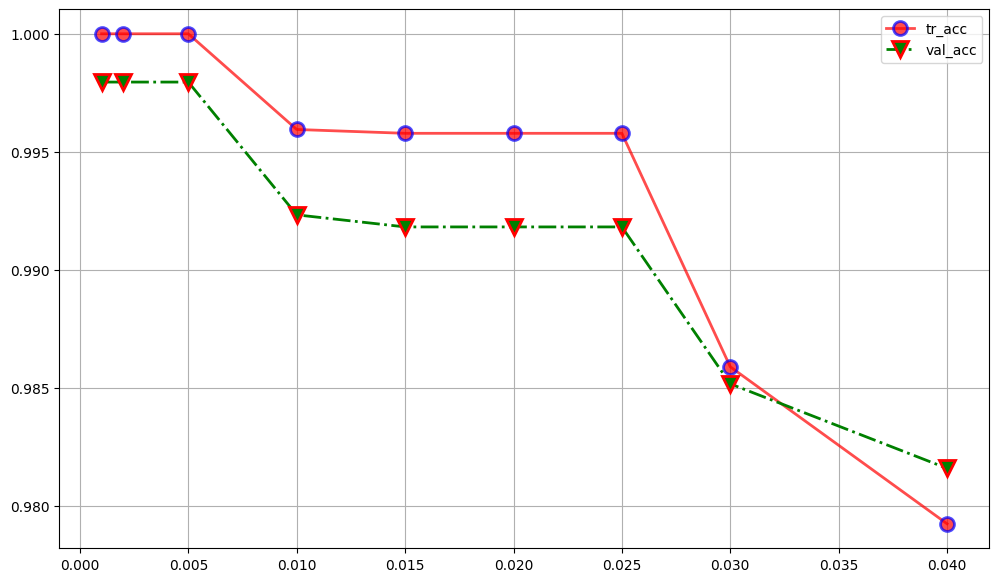

График после правки TODO 1  
График качественно не изменился. Изменился только масштаб ровно в два раза по max impurity  
Для понимания на сколько сложное дерево получается, добавил на график аннотации к точкам - количество листев в дереве. На графике видно, как только увеличивается кол-во листьев, а значит растёт сложность модели, так сразу получаем прирост в точности. 17 листьев обеспечивают 100% точность на трейне.   
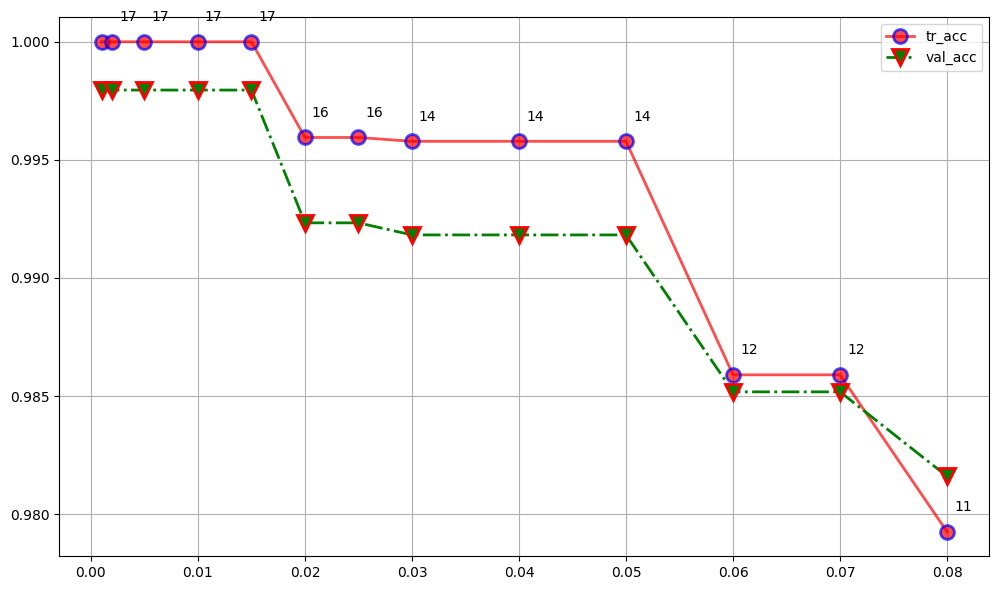

На промежутке от 0.075 до 0.18 точность на тренировочной выборке ниже, чем на тесте. Возможно, не очень удачно разделили на тест и трейн. Может быть стоило перемешать данные перед разделением. Но это от нас не зависит - разбиение сделано авторами датасета. Может быть стоит использовать k-fold для лучшей оценки точности  
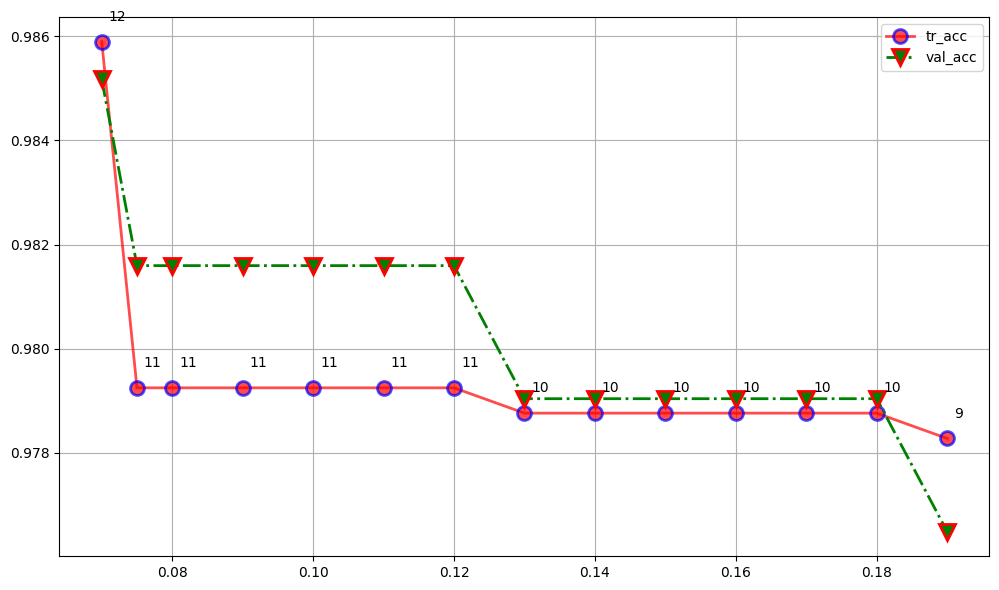

Если смотреть ещё правее по max impurity, то увидим слабую, недообученную модель. Пенёк (два листа и одно решающее правило) даёт точность 0.77 на трейне и 0.61 на тесте. И левее 0.2 уже без сюрпиризов - точность на тренировочной выборке выше, чем на тесте.  
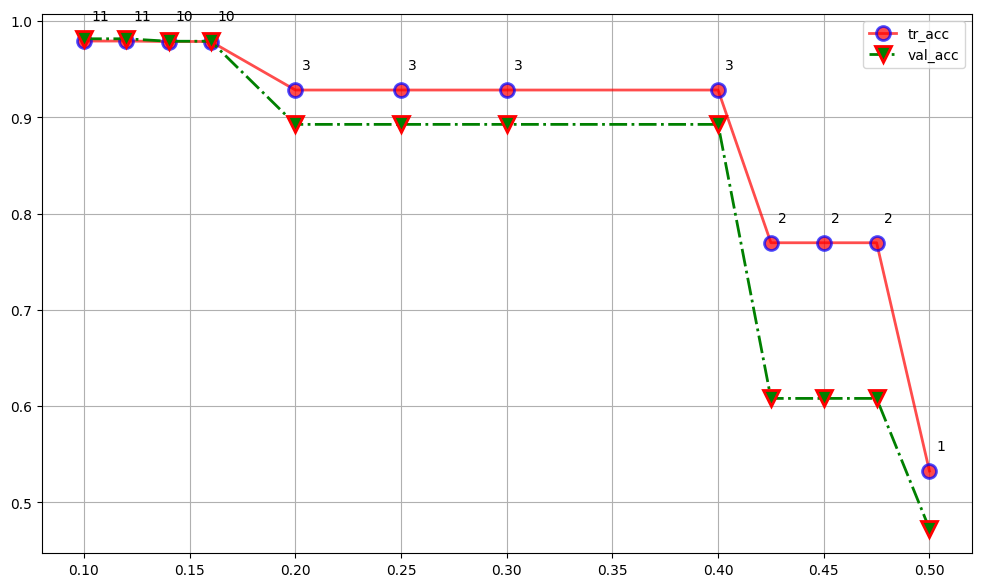

#### Пропуски. Вносим шум пропусками

Запретил делать ветвление по пропущенному значению признака "?" (TODO 3).  

Теперь я могу портить данные заменяя часть значений на неизвестно. Процедура miss_data. Пропуски в исходном датасете присутствуют только в атрибуте stalk-root (ножка гриба), attr_index = 10. Посмотрим на сколько устойчиво дерево к пропускам. Добавляем пропуски в атрибуты отличных от stalk-root

Эксперимент с исходными пропусками  
**miss_experiment(trainObjects,testObjects,miss_rate = 0.0,imps = imps1)**  
График для дерева обученном на исходном датасете (miss_rate=0.0) на промежутке до 0.08 не изменился.  
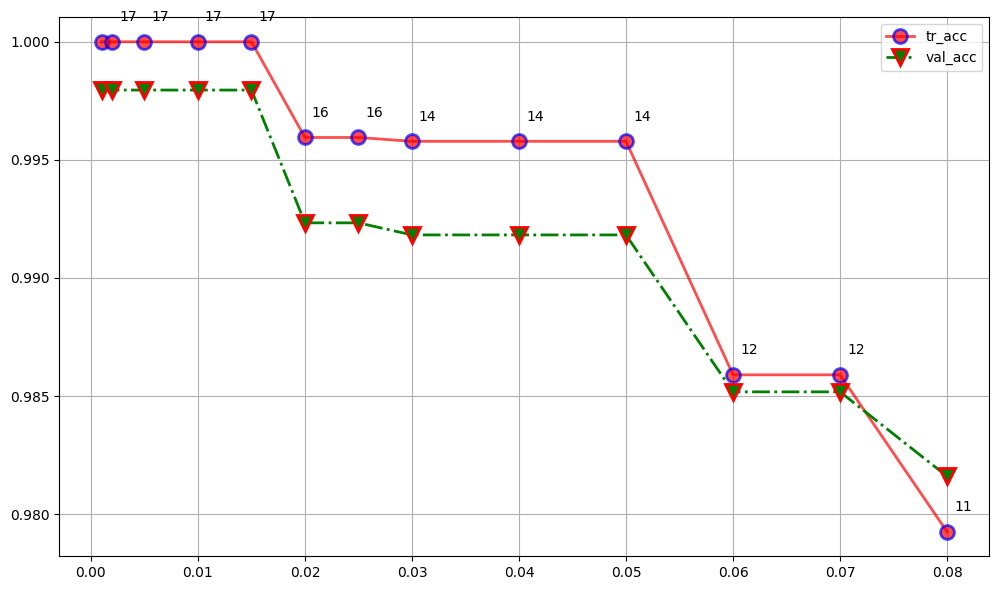

В данные добавлены 10% новых пропусков.  
**miss_experiment(trainObjects,testObjects,miss_rate = 0.10,imps = imps1)**  

Модель стала значительно сложнее. Прежде модели нужно было 17 листьев, чтобы заучить весь тестовый набор. Теперь точность на тесте продолжает расти вплоть до 69 листьев. Шумы в виде пропусков не дают модели рано достигнуть 100% точности. Ранее 100% точности достигалась при impurity=0.015, теперь при impurity=0.002. Точность на тесте перестаёт расти при impurity=0.04. Я бы сказал, что дальше impurity=0.03 (39-40 листьев) усложнять модель не стоит. Велик риск переобучения.  
При impurity>=0.04 точность на тесте выше. Возможно, это объясняется, тем что данные на тесте менее шумные. Шум мы в этом эксперименте добавляли только в трэйн.  
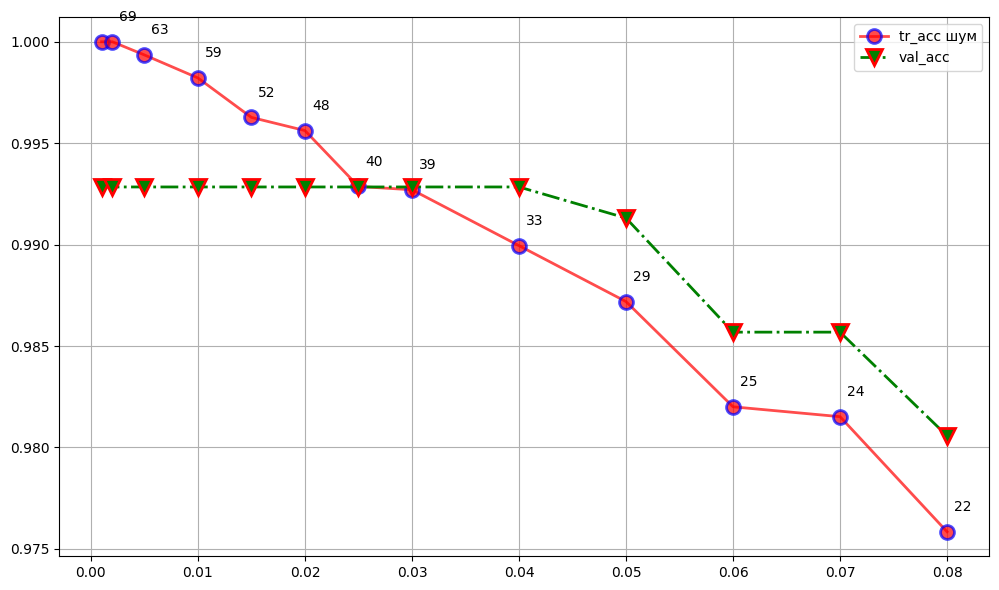

В данные добавлены 20% новых пропусков.  
**miss_experiment(trainObjects,testObjects,miss_rate = 0.20,imps = imps1)**  

Точность на тесте чуть подросла (impurity=0.03). Видно явное переобучение (impurity<0.015) - точность на тесте чуть упала при продолжающемся росте точности на трэйне.  
impurity>0.04 - ещё больше стал зазор между тестом и трэйном. Шума в трэйне стало в два раза больше - 20% против 10% на предыдущем графике  
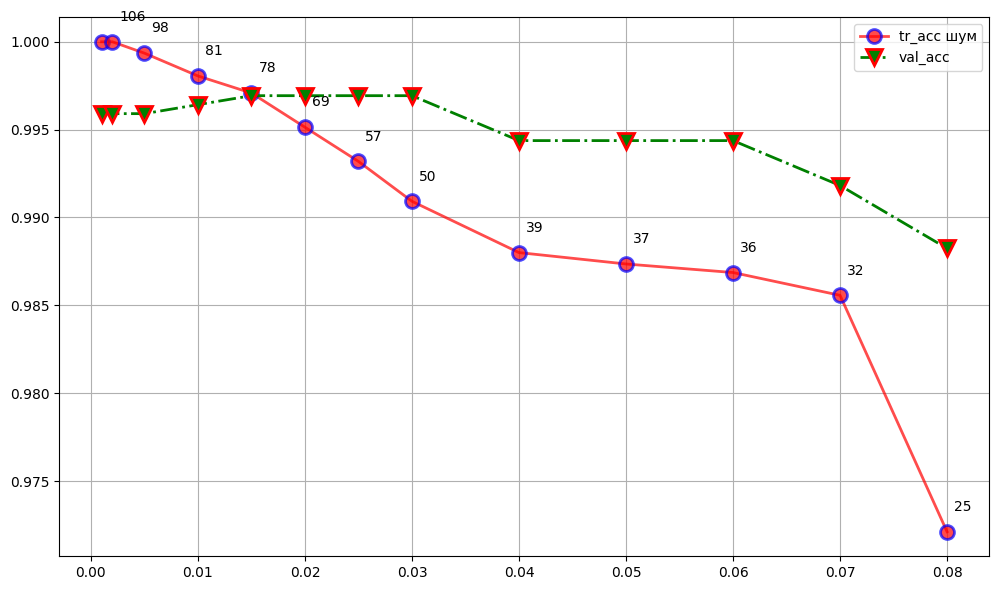

В данные добавлены 35% новых пропусков.  
**miss_experiment(trainObjects,testObjects,miss_rate = 0.35,imps = imps1)**  

**Магия шума!** Зазор увеличился на столько, что точности на тесте некуда расти, она упёрлась в 1. Или модель сумела стать достаточно сложной, и, похоже, получила какую-то предсказательную силу.

Модель переобучилась при impurity<0.04

Добавил параметр show_miss0, чтобы показать на графике и незашумлённый трэйн  
**miss_experiment(trainObjects,testObjects,miss_rate = 0.30,imps = imps1,show_miss0=True)**  
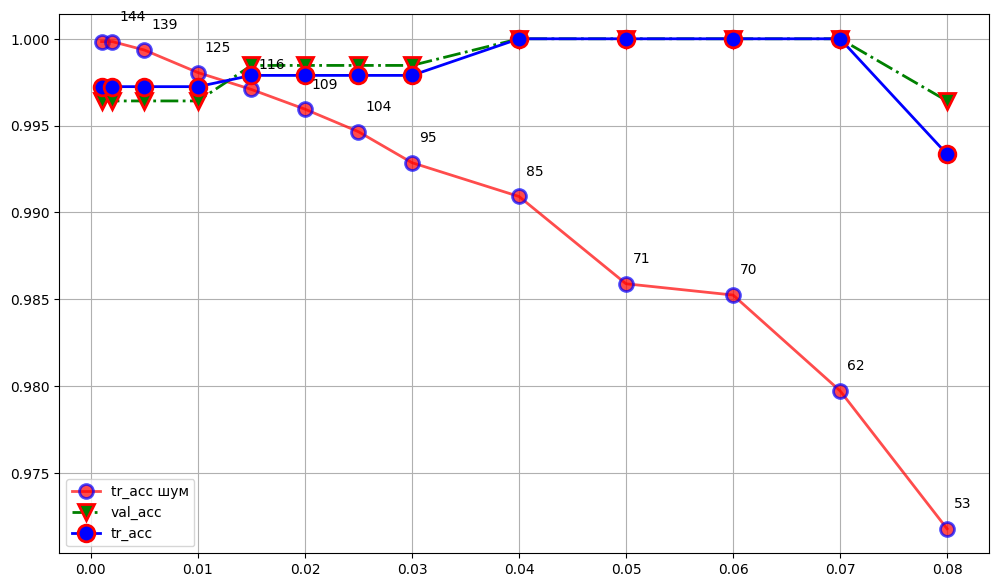

В данные добавлены 40% новых пропусков.  
**miss_experiment(trainObjects,testObjects,miss_rate = 0.40,imps = imps1)**  

Слишком много шума. Точность 1 на тесте уже не достигается. Есть участок переобучения (impurancy<=0.01), где точность на тесте падает при росте точности на зашумлённом трэйне. Участок impurancy<=0.06 это тоже, скорее всего, нужно назвать переобучением  
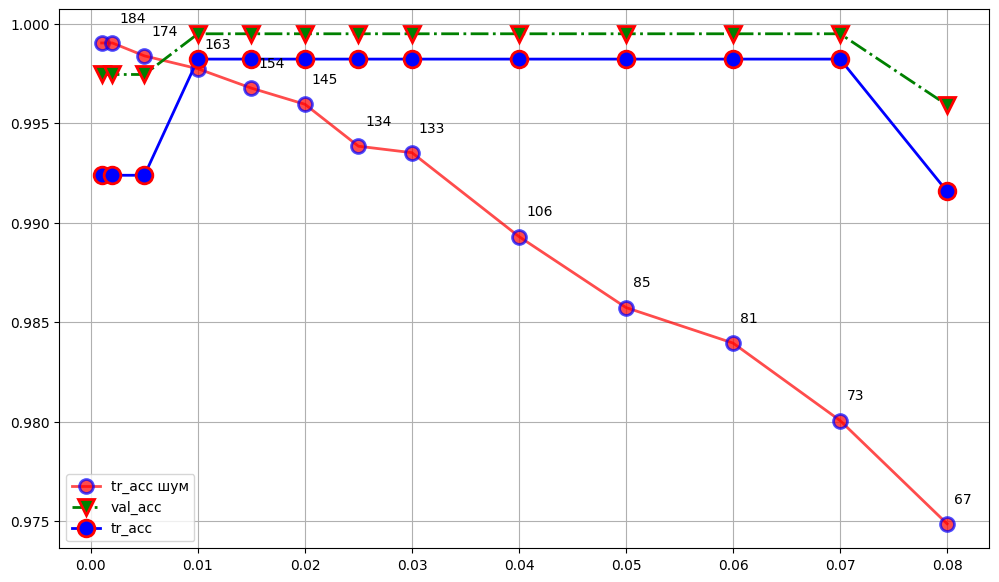

#### Вносим шум неверными данными



Повторим картинку без шума (доля неверных данных wrong_rate=0)
**wd_experiment(trainObjects,testObjects,wrong_rate= 0.0,imps = imps1)**

график не отличается от того что был ранее. Приведём его здесь как начальную точку для дальнейшеего сравнения  
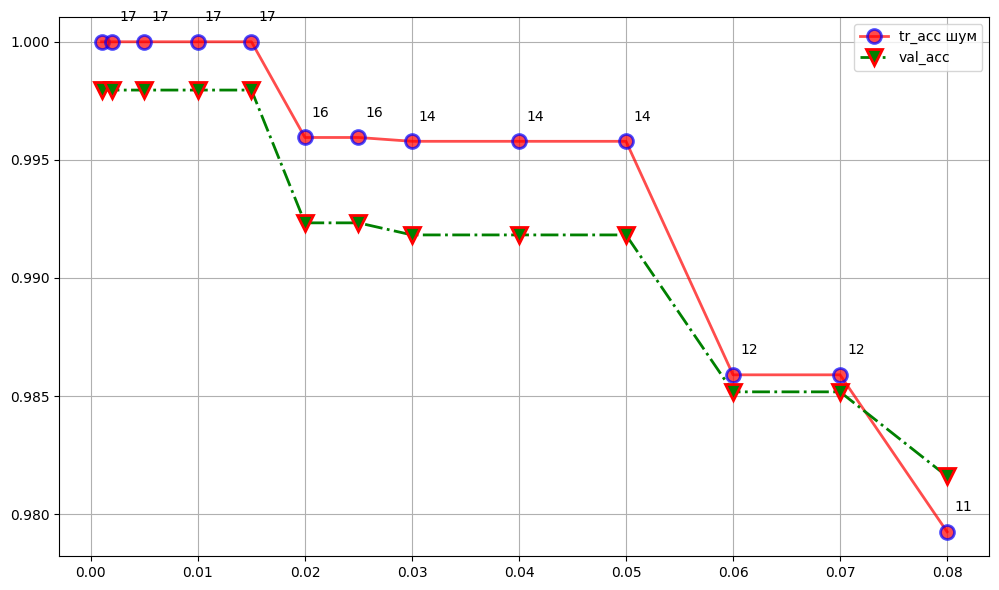

5% шума  
**wd_experiment(trainObjects,testObjects,wrong_rate= 0.05,imps = imps1w)**  

5% неверных данных - это как 30% процентов пропусков. Идея та же - шум не даёт модели при обучении быстро достигнуть 100% точности на простых данных. Простых в том смысле, что дерево из трёх листов обеспечивает точность выше 90%.  
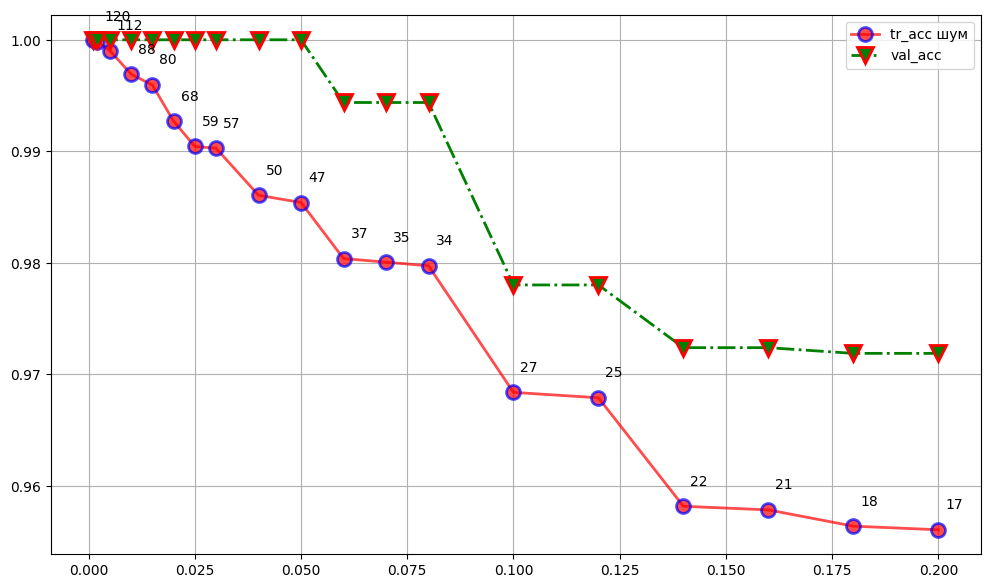

10% шума  
**wd_experiment(trainObjects,testObjects,wrong_rate= 0.10,imps = imps1w)**  

Теперь уже не достигаем единички по точности на тесте. Понятно, что слишком много добавили шума и модель не решает задачу.
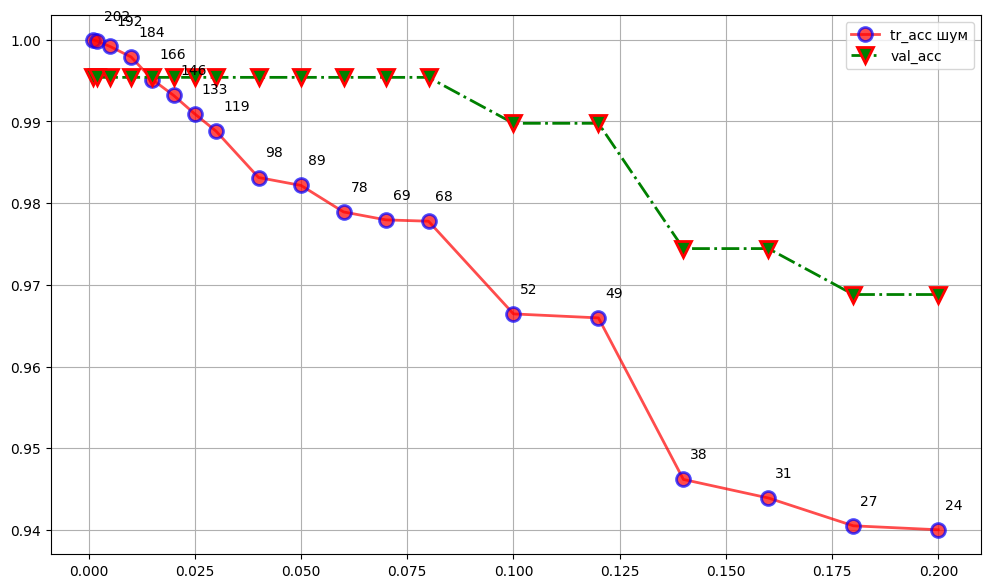

15% шума  
**wd_experiment(trainObjects,testObjects,wrong_rate= 0.15,imps = imps1w)**  

Как - то не очень устойчивая картинка. Вроде точность чуть упала в предыдущем случае, а тут опять вернулись к 1 по точности
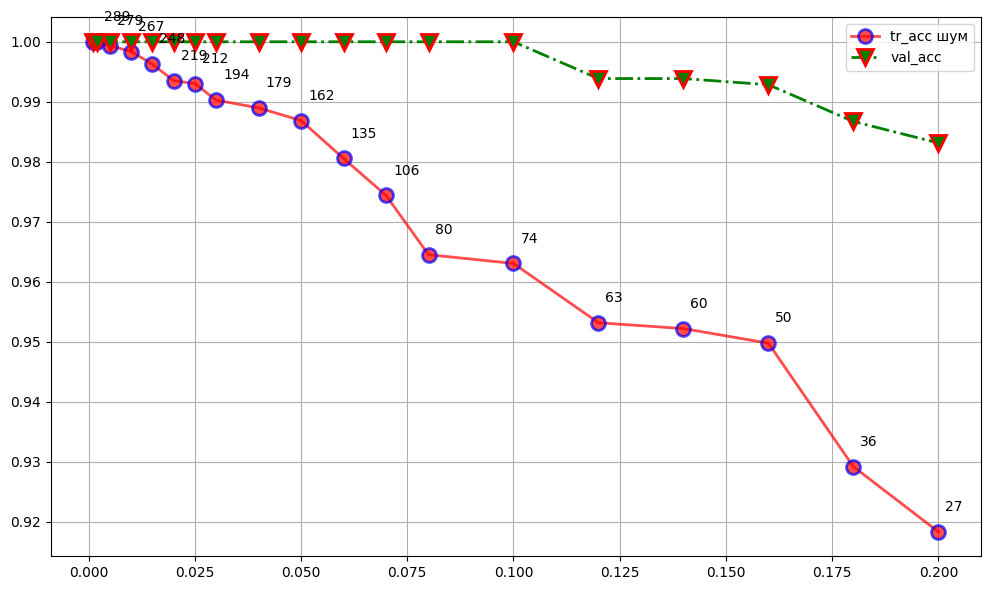

20% шума  
**wd_experiment(trainObjects,testObjects,wrong_rate= 0.20,imps = imps1w)**  
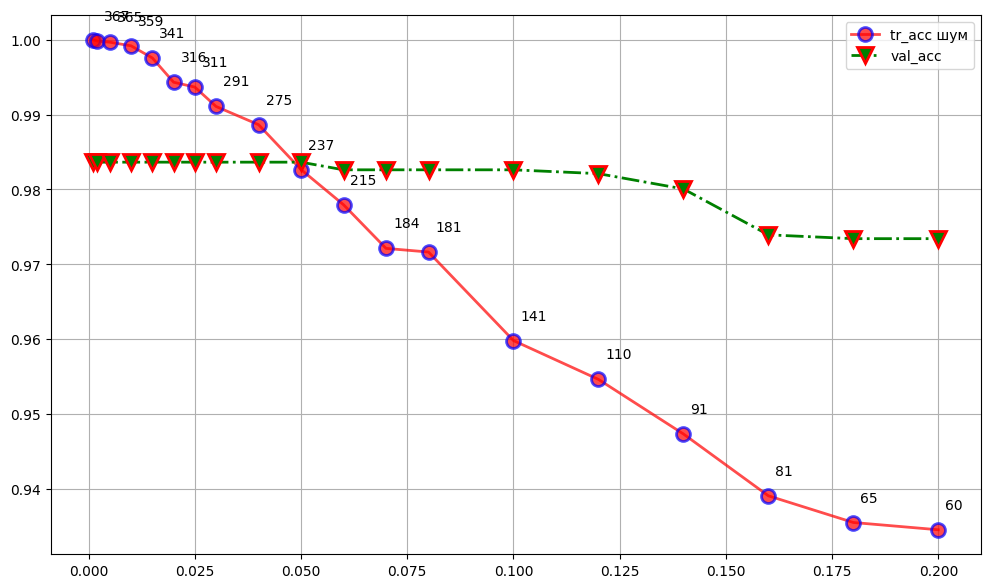

### RForest

#### Вариации размера bootstrap выборки

bootstrap_size=5000  
**rf_imp_max_acc(trainObjects, testObjects, imp_max_grid=imps1, trees_cnt=10, bootstrap_size=5000)**

Вынес на график среднее значение точности на деревьях леса (синяя линия). Серая область около средних значений покрывает различные значения точности в лесу от минимальных значений до максимальных. Более тёмным выделена область стандартного отклонения точности по лесу. Впринципе, такую же картинку можно рисовать и для леса на тесте. Но это бы загромоздило рисунок. На тесте показал только результат голосования - зелёный пунктир. Результат голосования на обучении - красная линия.  
Точки средней точности в лесу (синяя линия) аннотировал средним количеством листьев в деревьях леса.

Казалось бы результат голосования должен быть выше среднего по лесу. Но нет - есть два случая с обратной ситуацией (impurancy = [0.05, 0.015]). Оба случая - это когда модель переходит с одного стационарного плато по точности на другое. (**Наблюдение rf1**)

На последних двух плато (impurancy = [0.025,0.04] и impurancy<=0.01) вариация по точности среди моделей леса очень мала. Практически одинаковые модели - теряется идея голосования. (**Наблюдение rf2**)

Точность 100% на тесте достигается

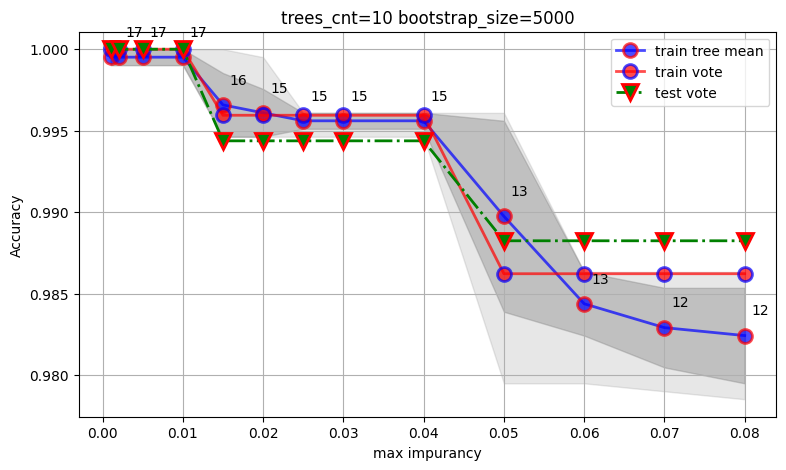

bootstrap_size=4000  
**rf_imp_max_acc(trainObjects, testObjects, imp_max_grid=imps1, trees_cnt=10, bootstrap_size=4000)**

Картинка качественно не изменилась. Чуть хуже стало с точностью на тесте.

Смысл голосования теряется, мы это видели ранее (наблюдение rf2)

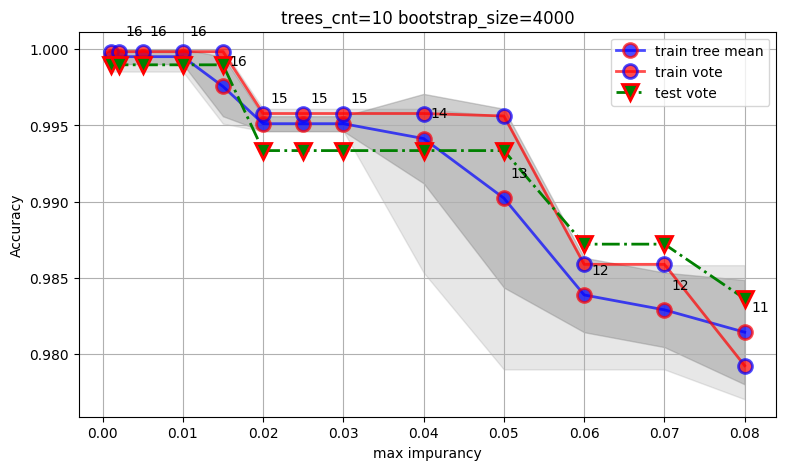

цитата из статьи на [habr](https://habr.com/ru/companies/ods/articles/324402/)  
"Бэггинг эффективен на малых выборках, когда исключение даже малой части обучающих объектов приводит к построению существенно различных базовых классификаторов. В случае больших выборок обычно генерируют подвыборки существенно меньшей длины."

Будем пробовать двигаться к малым выборкам. Чуть увеличим количество деревьев чтоб в обучение попало побольше данных. Т.е уменьшаем размер bootstrap выборки и одновременно увеличиваем кол-во деревьев. 

bootstrap_size=900  
**rf_imp_max_acc(trainObjects, testObjects, =imps1, trees_cnt=10, bootstrap_size=900)**

За счёт голосования модель ещё обеспечивает близкую к предыдущим моделям точность на тесте. 

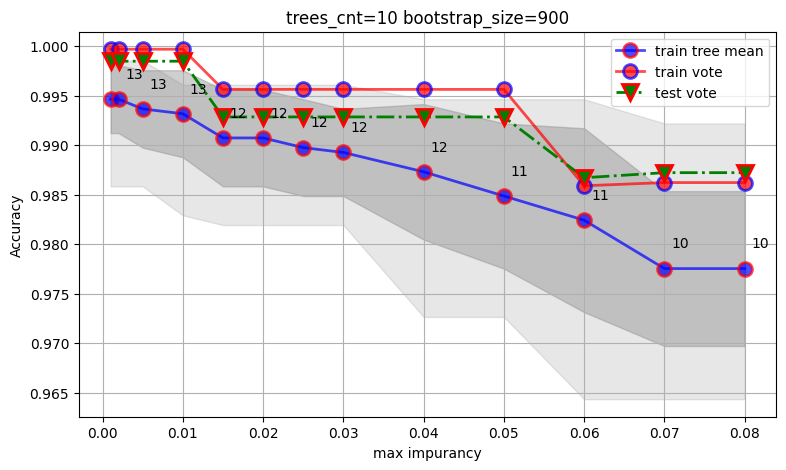

И если идти дальше в сторону уменьшения размера bootstrap выборки, то что бы сохранить точность, нужно увеличивать количество деревьев 

bootstrap_size=620  
**rf_imp_max_acc(trainObjects, testObjects, imp_max_grid=imps1, trees_cnt=12, bootstrap_size=620)**

Это очень неустойчивая картинка. В окрестности 590 - 630 по bootstrap_size. Небольшое изменение bootstrap_size требует подбора количества деревьев, чтобы сохранить точность

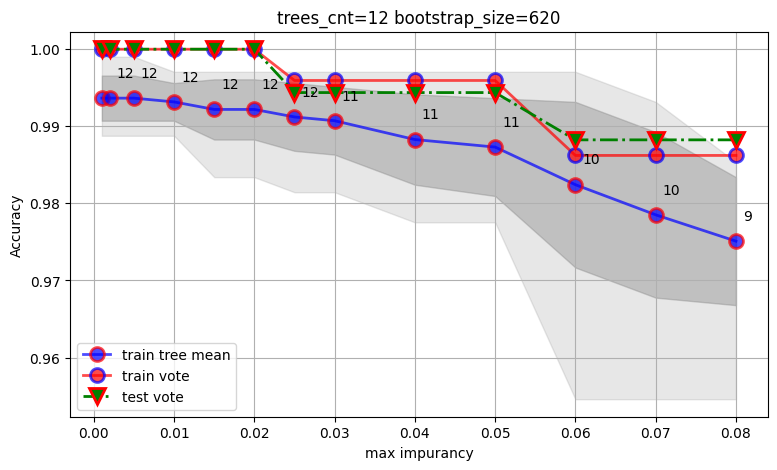

#### Вариации количества деревьев

Вернёмся к размеру выборки bootstrap_size=900 и построим зависимость точности от кол-ва деревьев для impurancy=0.02; impurancy=0.03  
Вроде бы 10 деревьев достаточно, но явно модели не хватает монотонности по точности при голосовании  
impurancy=0.03 Для trees_cnt > 6 в лесу встречаются деревья со 100% точностью на обучающей выборке 

**rf_trees_cnt_acc(trainObjects, testObjects, trees_cnt_grid=range(5,26), imp_max=0.02, bootstrap_size=900)**  
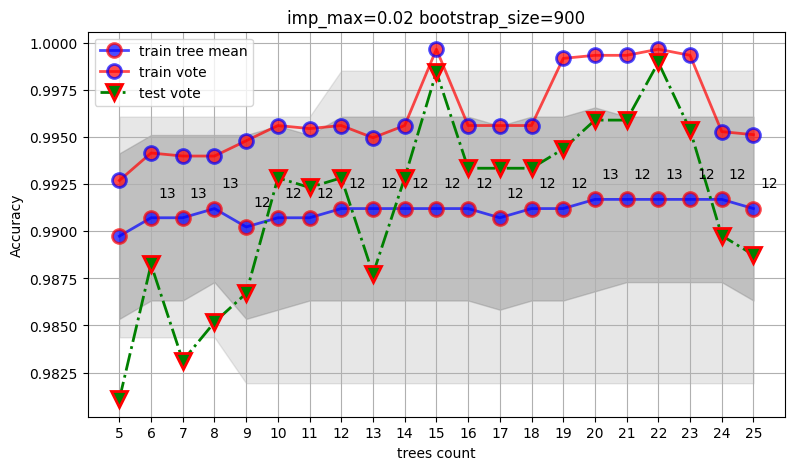

**rf_trees_cnt_acc(trainObjects, testObjects, trees_cnt_grid=range(5,26), imp_max=0.03, bootstrap_size=900)**  
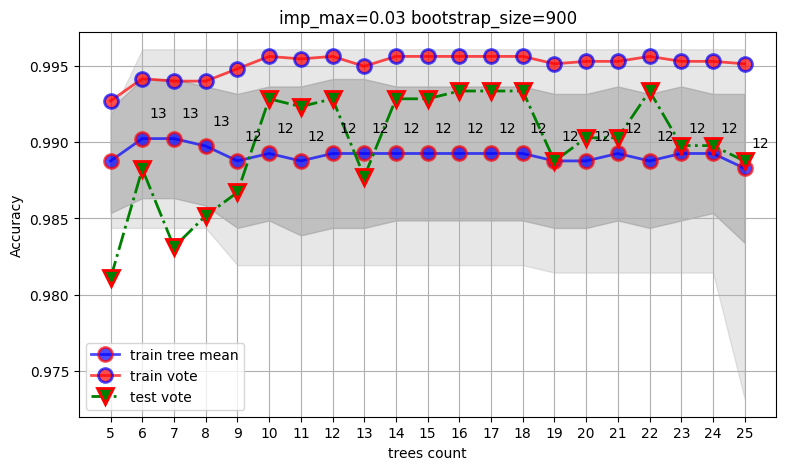

Попробовал уменьшить imp_max до 0.01
Вот здесь присутствует некая монотонность. Если не смотреть на тест. То нужно выбирать 22 - 23 дерево для леса.

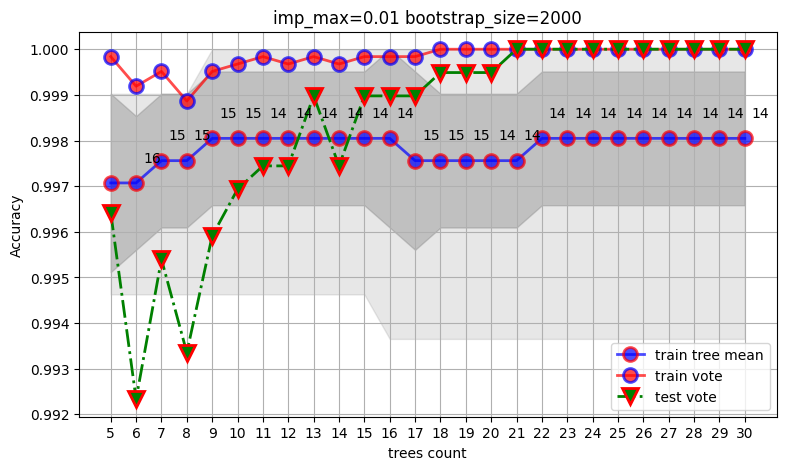

#### Random Forest с реализацией обучения по подпоространству атрибутов

Вариации количества деревьев

По сравнению с предыдущей картинкой, когда обучение велось по полному набору атрибутов, стало значительно лучше. А ведь объём просмотренных данных при обучении уменьшился, и казалось результат должен быть хуже. Но нет - модель поставлена в более жёсткие рамки, вынуждена строить более сложные деревья (глубина получается не ниже 20)  

**rf_trees_cnt_acc(
    trainObjects, testObjects, trees_cnt_grid=range(3,31), 
    imp_max=0.01, bootstrap_size=2000, d_l=15, m=5)**

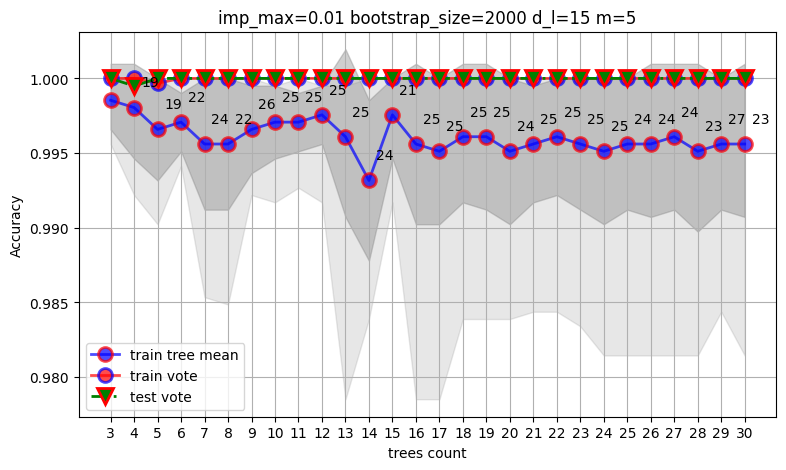

ещё сильней уменьшил размер подпространства атрибутов (d_l 15 -> 10). На треть! Теперь видно как работает голосование. За счёт голосования модель по-прежнему чуствует себя не плохо

**rf_trees_cnt_acc(
    trainObjects, testObjects, trees_cnt_grid=range(3,31), 
    imp_max=0.01, bootstrap_size=2000, d_l=10, m=5)**

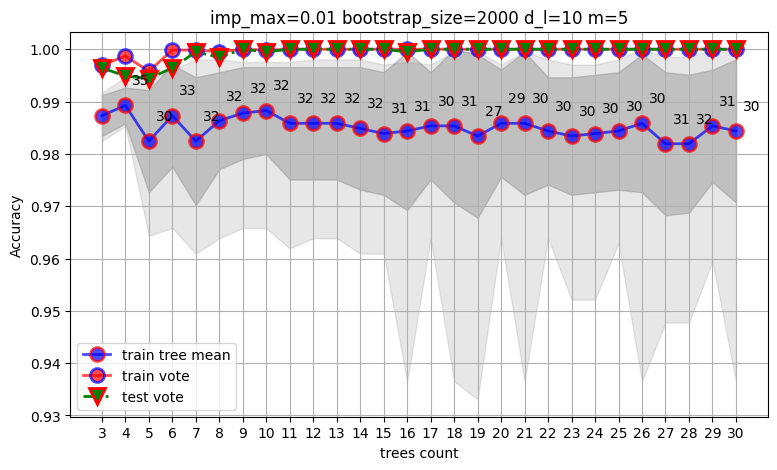

# Код

## DTree

In [ ]:
# символ "?" используется как метка для пропуска в данных
MISS_VAL = '?'

# Пропуски в исходном датасете присутствуют только в атрибуте 
# stalk-root (ножка гриба), attr_index = 10.
# причём пропусков там примерно треть
# так что дополнительно портить его не будем
STALK_ROOT_ATTR = 10

# ещё обнаружился 15 признак где единственное значение
# его тем более не трогаем
SKIP_ATTR = 15

# COLAB_DRIVE
#   True - среда выполнения colab
COLAB_DRIVE = False

if COLAB_DRIVE:
    #подготовка файлов
    from google.colab import drive # type: ignore
    drive.mount('/content/drive/')

    src_data_dir = 'datasets/mushrooms/'
    dst_data_dir = 'mushrooms/'
    
    !rm -rf $dst_data_dir
    !mkdir -p $dst_data_dir
    !ls -l /content/drive/My\ Drive/$src_data_dir
    !cp /content/drive/My\ Drive/$src_data_dir/* ./$dst_data_dir

else:
    dst_data_dir = './mushrooms/'


In [2]:
import math
import random
import operator
import typing

import copy
import sys
import os.path
import numpy as np

import matplotlib.pyplot as plt

In [35]:
def get_attr_cnt(objects):
	return len(objects[0])

def loadData(trainfn, testfn, examfn):
    x1 = []
    x2 = []
    x3 = []
    f = open(testfn)
    for st in f:
        tokens = st.rsplit(',')
        if len(tokens) > 1:
            obj = []
            for i in range(len(tokens)):
                obj.append(tokens[i][0])
            x2.append(obj)
    f.close()
    f = open(trainfn)
    for st in f:
        tokens = st.rsplit(',')
        if len(tokens) > 1:
            obj = []
            for i in range(len(tokens)):
                obj.append(tokens[i][0])
            x1.append(obj)
    f.close()
    if os.path.exists(examfn):
        f = open(examfn)
        for st in f:
            tokens = st.rsplit(',')
            if len(tokens) > 1:
                obj = []
                for i in range(len(tokens)):
                    obj.append(tokens[i][0])
            x3.append(obj)
    f.close()
    return x1, x2, x3


#показать объекты из массива data
def showData(data):
	for d in data:
		print(d)

Objects = list[list[str]]
Side = typing.Literal['L','R','']

class DTree:

	def __init__(self, 
		impMax: float, 
		attrs: list[int], 
		m: int | None = None
		) -> None:
		'''
		attrs
			- Идея пришла из random forest.
			  Возможность учится на подмножестве атрибутов.
			  attrs не включает колонку класса
		m   - идея пришла из random forest
			  для построения каждого ветвления случайно рассматриваем кандидатов 
			  не из всех признаков а только из подмножества m.
			  каждое ветвление - случайно генерим кандидатов.
			  здесь количество атрибутов не включает колонку класса

		При подсчёте нечистоты используются только классы объектов, 
		так что полный / неполный набор не важно.
		В правила пишем индексы атрибутов из полного набора, 
		чтоб можно было печатать дерево и там были индексы атрибутов исходного набора.
		Предсказываем на полном наборе атрибутов.
		Везде в интерфейсах ходят полные наборы атрибутов и индексы атрибутов полного набора.
		'''
		self.nodes = []
		self.impMax = impMax
		self.attrs = attrs
		self.m = m

	def classify(self, obj: list[str]) -> str:
		'''
		по обученному дереву классифицирует объект obj
		e / p - съедобный / ядовитый
		edible / poisonous mushroom

		для классификации подаём полный набор атрибутов
		правила содержат индексы полного набора
		'''
		ni = 0

		while self.nodes[ni]["aInd"] != 0:
			# ветвление по значению av признака ai
			ai = self.nodes[ni]["aInd"]
			av = self.nodes[ni]["aVal"]
			# если объект имеет значение av признака ai
			# идём налево  
			if obj[ai] == av:
				ni = self.nodes[ni]["nIndL"]
			else:
				ni = self.nodes[ni]["nIndR"]
		return self.nodes[ni]["aVal"]

	@staticmethod
	def applyRule(
		attrInd: int,
		attrVal: str, 
		objects: Objects
	) -> tuple[Objects, Objects]:
		'''
		в соответствии с правилом attrInd,attrVal разбивает объекты на два подмножества.
		левое - объекты удовлетворяют правилу, все остальные объекты в правое
		'''
		lObjects = []
		rObjects = []
		#print("rule: {} {}".format(rule[0], rule[1]))
		for d in objects:
			if d[attrInd] == attrVal:
				lObjects.append(d)
			else:
				rObjects.append(d)

		return lObjects, rObjects

	@staticmethod
	def calcClasses(objects: Objects) -> tuple[int,int]:
		'''
		->(eCnt,pCnt) количество объектов одного и другого класса среди objects
		'''
		eCnt = 0
		pCnt = 0
		if len(objects) == 0:
			return 0

		for d in objects:
			if d[0] == 'e':
				eCnt = eCnt + 1
			else:
				pCnt = pCnt + 1

		return (eCnt,pCnt)

	@staticmethod
	def getImpurity(objects: Objects) -> float:
		'''
		вычисляет нечистоту объектов.
		например чтобы понять в какой ветке разбиения нечистота ниже
		'''
		cls = DTree.calcClasses(objects)

		# здесь предлагается нечистота в два раза меньшая от Gini impurity
		# потеряна 2, но возможно, двойку выкинули, так как при оптимизации она не играет роли
		# просто максимум не 1/2 а 1/4
		# imp = cls[0]*cls[1]/(len(objects)**2)

		# todo 1
		# поправленная версия
		imp = 2 * cls[0]*cls[1]/(len(objects)**2)

		return imp

	@staticmethod
	def getDeltaImpurity(
		objects: Objects,
		objectsL: Objects,
		objectsR: Objects
		) -> float:
		'''
		вычисляет уменьшение нечистоты при прохождении данного узла
		'''
		imp = DTree.getImpurity(objects)
		lImp = DTree.getImpurity(objectsL)
		rImp = DTree.getImpurity(objectsR)
		delta = imp - lImp*len(objectsL)/len(objects) - rImp*len(objectsR)/len(objects)
		return delta

	def getAccuracy(self, testObjects: Objects) -> float:
		'''
		на обученном дереве сделать предсказание и посчитать точность
		'''
		t = 0
		for d in testObjects:
			c1 = self.classify(d) #вычисленный класс объекта
			c = d[0] #истинный класс объекта
			if c == c1:
				t = t+1
		acc = t/len(testObjects)
		return acc

	@staticmethod
	def getValueSet(trainObjects: Objects, attrIndex: int) -> set[str]:
		'''
		возможные значения атрибута среди объектов.
		например среди объектов ветки
		'''

		# TODO 3
		# метод используется только при построении решающего правила 
		# по атрибуту attrIndex
		# запретим ветвление по значению ? 

		values = set()
		for d in trainObjects:
			# запретим ветвление по значению ?
			if d[attrIndex] != MISS_VAL:
				values.add(d[attrIndex])
	
		return values

	def trainModelTest(self) -> None:
		'''
		пример обученного дерева
		'''
		node0 = {"aInd":3, "aVal":"r", "nIndL":1, "nIndR":2}
		node1 = {"aInd":0, "aVal":"e"}
		node2 = {"aInd":5, "aVal":"a", "nInd":3, "nIndR":4}
		node3 = {"aInd":0, "aVal":"p"}
		node4 = {"aInd":0, "aVal":"e"}
		self.nodes = [node0, node1, node2, node3, node4]

	#### обучение модели (дерево решений) ####
	def makeRule(self, trainObjects: Objects) -> tuple[dict | None,Objects,Objects]:
		'''
		Создает правило, выбирая наилучшее условие, минимизируя нечистоту по gini.
		разбивает исходную выборку на две - левую и правую
		'''
		node = None
		trainObjectsL=[]
		trainObjectsR=[]

		attrIndex = 0
		attrValue = ""
		maxAcc = 0
		maxDImp = 0
		bestValue = ""
		bestAttrIndex = 0

		cls = self.calcClasses(trainObjects)
		imp = self.getImpurity(trainObjects)

		# attrs, m не включает в себя 0 (колонку класса)
		attr_space = self.attrs
		if self.m is not None:
			attr_space = random.sample(attr_space,k=self.m) 
			
		for attrIndex in attr_space:

			psValues = self.getValueSet(trainObjects, attrIndex)

			if len(psValues)==1:
				continue 

			for c in psValues:
				objectsL, objectsR = self.applyRule(attrIndex, c, trainObjects)
				if len(objectsL)*len(objectsR) > 0:
					delta = self.getDeltaImpurity(trainObjects, objectsL, objectsR)
					if delta > maxDImp:
						bestAttrIndex = attrIndex
						bestValue = c
						maxDImp = delta
		
		#assert bestAttrIndex>0, 'Не удалось создать правило'
		if bestAttrIndex > 0:

			node = {"aInd":bestAttrIndex, "aVal":bestValue}

			trainObjectsL, trainObjectsR = self.applyRule(bestAttrIndex, bestValue, trainObjects)

		return node, trainObjectsL, trainObjectsR

	@staticmethod
	def makeLeaf(objects: Objects) -> dict:
		'''
		Создает лист - клас определяет по большинству объектов
		'''
		
		cl = "p"
		cls = DTree.calcClasses(objects)
		# imp = self.getImpurity(objects)
		if (cls[0] > cls[1]):
			cl = "e"

		node = {"aInd":0, "aVal":cl}

		#print("makeLeaf({}):{}/{} ".format(len(objects),cls[0],cls[1]))
		#print("new leaf node{0} class:{1}\t\t ({2}:{3}+{4}) imp={5}".format(len(self.nodes),node["aVal"],len(objects),cls[0],cls[1],imp))
		return node

	def addNode(self, node: dict, side: Side, parentIndex: int) -> None:
		'''
		Добавляет узел в дерево 
		и присоединяет его к родительскому узлу 
		с номером parentIndex со стороны side.
		'''
		self.nodes.append(node)

		# вершина дерева создаётся этим же методом
		# для вершины дерева нет родителя
		if parentIndex >= 0:
			if side == "L":
				self.nodes[parentIndex]["nIndL"] = len(self.nodes)-1
			if side == "R":
				self.nodes[parentIndex]["nIndR"] = len(self.nodes)-1

	def trainNode(
			self, 
			objects: Objects, 
			side: Side = '',
			parentIndex: int = -1
			) -> None:
		'''
		обучает один узел дерева. рекурсивная функция.
		старт обучения - вызов с параметрами по умолчанию
		'''

		#print("trainNode({})".format(len(objects)))
		if len(objects) == 0:
			return
		imp = self.getImpurity(objects)
		#print("imp:{}".format(imp))
		if imp < self.impMax:
			node = self.makeLeaf(objects)
			self.addNode(node, side, parentIndex)
		else:
			node, objectsL, objectsR = self.makeRule(objects)

			# не удалось построить разбиение
			# строим лист
			if node is None:
				node = self.makeLeaf(objects)
				self.addNode(node, side, parentIndex)
			
			# добавляем правило
			else:
				self.addNode(node, side, parentIndex)
				currIndex = len(self.nodes)-1
				self.trainNode(objectsL, "L", currIndex)
				self.trainNode(objectsR, "R", currIndex)

	def showModel(self) -> None:
		'''
		печатаем дерево правил
		'''
		print("tree:")
		i = 0
		for n in self.nodes:
			if n["aInd"] > 0:
				print("rule node{0} attr:{1} value:{2} childL:{3} childR:{4}".format(i,n["aInd"],n["aVal"],n["nIndL"],n["nIndR"]))
			else:
				print("leaf node{0} class:{1}".format(i,n["aVal"]))
			i = i+1

	def leaf_cnt(self) -> int:
		'''
		для понимания на сколько сложное дерево получилось
		посчитаем количество листьев
		'''
		
		cnt = 0
		for n in self.nodes:
			if n["aInd"] == 0:
				cnt += 1

		return cnt

In [36]:
trainObjects, testObjects, examObjects = loadData(f"{dst_data_dir}/train.txt", f"{dst_data_dir}/test.txt", f"{dst_data_dir}/exam.txt")
attr_cnt= get_attr_cnt(trainObjects)
(len(trainObjects),len(testObjects),len(examObjects),attr_cnt)

(6168, 1956, 1, 22)

In [37]:
impMax = 0.05
#trainObjects, testObjects, examObjects = loadData("mushrooms/train.txt", "mushrooms/test.txt", "mushrooms/exam.txt")
attr_cnt= get_attr_cnt(trainObjects)
tree = DTree(impMax,attrs = list(range(1,attr_cnt)))
#trainModelTest()
tree.trainNode(trainObjects,"",-1)
tr_acc = tree.getAccuracy(trainObjects)
val_acc = tree.getAccuracy(testObjects)
tree.showModel()
print("imp, train_acc, val_acc, leaf_cnt {} {} {} {}".format(impMax, tr_acc, val_acc, tree.leaf_cnt()))

tree:
rule node0 attr:8 value:b childL:1 childR:2
leaf node1 class:p
rule node2 attr:19 value:h childL:3 childR:6
rule node3 attr:7 value:n childL:4 childR:5
leaf node4 class:e
leaf node5 class:p
rule node6 attr:7 value:n childL:7 childR:24
rule node7 attr:2 value:f childL:8 childR:13
rule node8 attr:21 value:d childL:9 childR:12
rule node9 attr:4 value:t childL:10 childR:11
leaf node10 class:e
leaf node11 class:p
leaf node12 class:e
rule node13 attr:6 value:w childL:14 childR:23
rule node14 attr:20 value:v childL:15 childR:22
rule node15 attr:3 value:p childL:16 childR:17
leaf node16 class:p
rule node17 attr:3 value:g childL:18 childR:19
leaf node18 class:p
rule node19 attr:8 value:g childL:20 childR:21
leaf node20 class:p
leaf node21 class:e
leaf node22 class:p
leaf node23 class:p
rule node24 attr:19 value:r childL:25 childR:26
leaf node25 class:p
leaf node26 class:e
imp, train_acc, val_acc, leaf_cnt 0.05 0.9957846952010376 0.9918200408997955 14


### Эксперимент с пропусками

In [38]:
def miss_data(objects,miss_rate):
    '''
    Добавляем пропуски с долей miss_rate
    возвращаем изменённую выборку
    '''
    # STALK_ROOT_ATTR
    # Пропуски в исходном датасете присутствуют только в атрибуте 
    # stalk-root (ножка гриба), attr_index = 10.
    # причём пропусков там примерно треть
    # так что дополнительно портить его не будем
    
    missObjects = copy.deepcopy(objects)

    if miss_rate > 1e-4:
    
        obj_cnt = len(objects)
        attr_cnt = get_attr_cnt(objects)
        random.seed(42)

        for attr in range(1,attr_cnt):
            if attr == STALK_ROOT_ATTR:
                continue
            
            miss = random.choices([False,True],weights=[1-miss_rate,miss_rate],k=obj_cnt)

            for i,m in enumerate(miss):
                if m:
                    missObjects[i][attr] = MISS_VAL
        
    return missObjects

def miss_test(objects,miss_rate):
    
    mObjects = miss_data(objects,miss_rate)

    obj_cnt = len(objects)
    attr_cnt = get_attr_cnt(objects)

    miss = list([0 for _ in range(attr_cnt)])

    for obj in mObjects:
        for attr in range(attr_cnt):
            if obj[attr] == MISS_VAL:
                miss[attr] += 1
    
    for attr in range(attr_cnt):
        miss[attr] = round(miss[attr] / obj_cnt, 3)
    
    print(miss)

miss_test(trainObjects, miss_rate=0.1)

[0.0, 0.098, 0.1, 0.103, 0.096, 0.1, 0.098, 0.105, 0.093, 0.107, 0.335, 0.107, 0.1, 0.106, 0.104, 0.103, 0.097, 0.093, 0.1, 0.099, 0.101, 0.098]


In [39]:
# начало программы
trainObjects, testObjects, examObjects = loadData(f"{dst_data_dir}/train.txt", f"{dst_data_dir}/test.txt", f"{dst_data_dir}/exam.txt")

# собираем точность модели и строим график для заданных значений impurity
def miss_experiment(trainObjects,testObjects,miss_rate,imps,show_miss0=False):
	# портим train пропусками
	trainMObjects = miss_data(trainObjects,miss_rate)
	
	# обучение
	print("training:")

	tr_accs = []
	tr0_accs = []
	val_accs = []
	leaf_cnts =[]
	attr_cnt= get_attr_cnt(trainObjects)

	for imp in imps:
		tree = DTree(imp, attrs = list(range(1,attr_cnt)))
		tree.trainNode(trainMObjects,"",-1)
		tr_acc = tree.getAccuracy(trainMObjects)
		val_acc = tree.getAccuracy(testObjects)
		tr_accs.append(tr_acc)
		val_accs.append(val_acc)

		if show_miss0:
			tr0_acc = tree.getAccuracy(trainObjects)
			tr0_accs.append(tr0_acc)

		leaf_cnts.append(tree.leaf_cnt())
		print("imp, train_acc, val_acc {} {} {}".format(imp, tr_acc, val_acc))

	_, ax = plt.subplots(figsize=(12, 7))
	ax.plot(imps, tr_accs, 'o-r', alpha=0.7, label="tr_acc шум", lw=2, mec='b', mew=2, ms=10)
	ax.plot(imps, val_accs, 'v-.g', label="val_acc", mec='r', lw=2, mew=2, ms=12)
	if show_miss0:
		ax.plot(imps, tr0_accs, 'o-b', label="tr_acc", mec='r', lw=2, mew=2, ms=12)

	for i,imp in enumerate(imps): 
		if i>0:
			ax.annotate(leaf_cnts[i], (imp, tr_accs[i]), xytext=(5,15), textcoords='offset points')

	plt.legend()
	plt.grid(True)
	plt.show()

training:
imp, train_acc, val_acc 0.001 0.9990272373540856 0.9989775051124744
imp, train_acc, val_acc 0.002 0.9990272373540856 0.9989775051124744
imp, train_acc, val_acc 0.005 0.998378728923476 0.9989775051124744
imp, train_acc, val_acc 0.01 0.9977302204928664 0.9994887525562373
imp, train_acc, val_acc 0.015 0.996757457846952 0.9994887525562373
imp, train_acc, val_acc 0.02 0.99594682230869 0.9994887525562373
imp, train_acc, val_acc 0.025 0.9938391699092088 0.9994887525562373
imp, train_acc, val_acc 0.03 0.993514915693904 0.9994887525562373
imp, train_acc, val_acc 0.04 0.9892996108949417 0.9994887525562373
imp, train_acc, val_acc 0.05 0.9857328145265889 0.9994887525562373
imp, train_acc, val_acc 0.06 0.9839494163424124 0.9994887525562373
imp, train_acc, val_acc 0.07 0.9800583657587548 0.9994887525562373
imp, train_acc, val_acc 0.08 0.9748702983138781 0.9959100204498977


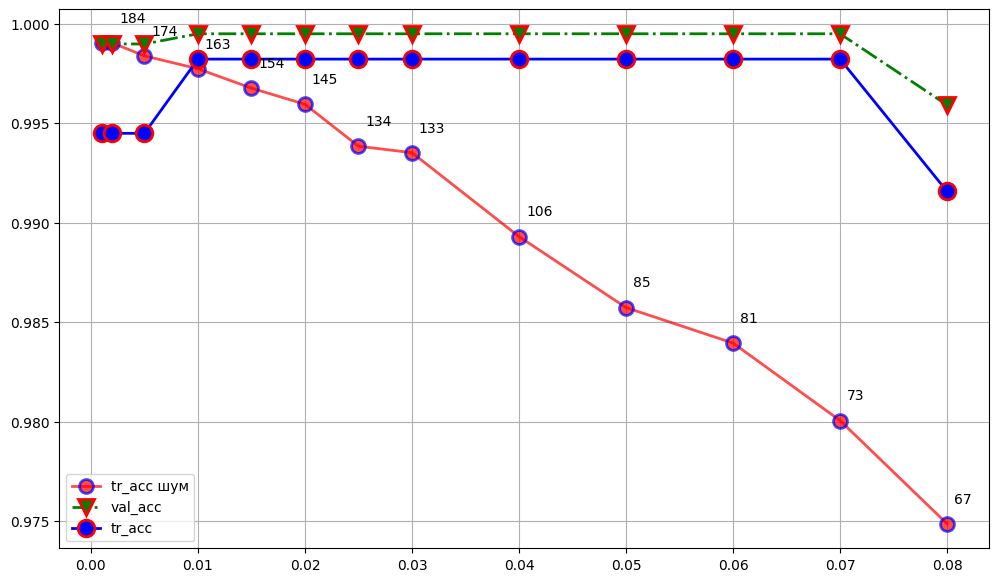

In [40]:
#эксперимент по точности от impMax
imps0 = [0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04]
imps1 = [0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
imps2 = [0.07, 0.075, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]

imps3 = [0.1, 0.12, 0.14, 0.16, 0.2, 0.25, 0.3, 0.4, 0.425, 0.45, 0.475, 0.5]

miss_experiment(trainObjects,testObjects,miss_rate = 0.40,imps = imps1,show_miss0=True)


### Эксперимент с неверными данными

Портим тренировочную выборку неверными значениями

In [41]:
# портим train неверными значениями
def	wrong_data(objects,wrong_rate):
	'''
	Добавляем неверные значения признаков с долей wrong_rate
	возвращаем изменённую выборку
	'''

	# STALK_ROOT_ATTR
    # Пропуски в исходном датасете присутствуют только в атрибуте 
    # stalk-root (ножка гриба), attr_index = 10.
    # причём пропусков там примерно треть
    # так что дополнительно портить его не будем
    # он и так содержит немного значений

    # SKIP_ATTR
	# ещё обнаружился 15 признак где единственное значение
    # его тем более не трогаем

	wObjects = copy.deepcopy(objects)

	if wrong_rate > 1e-4:
		
		obj_cnt = len(objects)
		attr_cnt = get_attr_cnt(objects)

		random.seed(42)

		for attr in range(1,attr_cnt):
			if attr == STALK_ROOT_ATTR:
				continue
            
			# возможные значения признака
			psValues = DTree.getValueSet(objects, attr)

			# не портим если портить не чем
			# есть такие. например, признак 15
			if len(psValues) == 1:
				continue

			for obj in wObjects:
                # решили портить значение атрибута (список длины 1)
				if random.choices([False,True],weights=[1-wrong_rate,wrong_rate])[0]:
					w_values = psValues.copy()
					w_values.remove(obj[attr])
					obj[attr] = random.choice(list(w_values))

	return wObjects


In [42]:
# портим данные, собираем точность модели 
# и строим график для заданных значений impurity
def wd_experiment(trainObjects,testObjects,wrong_rate,imps):
	# портим train неверными значениями
	trainMObjects = wrong_data(trainObjects,wrong_rate)
	
	# обучение
	print("training:")

	tr_accs = []
	val_accs = []
	leaf_cnts =[]
	attr_cnt= get_attr_cnt(trainObjects)

	for imp in imps:
		tree = DTree(imp, attrs = list(range(1,attr_cnt)))
		tree.trainNode(trainMObjects,"",-1)
		tr_acc = tree.getAccuracy(trainMObjects)
		val_acc = tree.getAccuracy(testObjects)
		tr_accs.append(tr_acc)
		val_accs.append(val_acc)

		leaf_cnts.append(tree.leaf_cnt())
		print("imp, train_acc, val_acc {} {} {}".format(imp, tr_acc, val_acc))

	_, ax = plt.subplots(figsize=(12, 7))
	ax.plot(imps, tr_accs, 'o-r', alpha=0.7, label="tr_acc шум", lw=2, mec='b', mew=2, ms=10)
	ax.plot(imps, val_accs, 'v-.g', label="val_acc", mec='r', lw=2, mew=2, ms=12)

	for i,imp in enumerate(imps): 
		if i>0:
			ax.annotate(leaf_cnts[i], (imp, tr_accs[i]), xytext=(5,15), textcoords='offset points')

	plt.legend()
	plt.grid(True)
	plt.show()

training:
imp, train_acc, val_acc 0.001 1.0 0.9897750511247444
imp, train_acc, val_acc 0.002 1.0 0.9897750511247444
imp, train_acc, val_acc 0.005 0.9998378728923476 0.9897750511247444
imp, train_acc, val_acc 0.01 0.9980544747081712 0.9897750511247444
imp, train_acc, val_acc 0.015 0.9972438391699092 0.9897750511247444
imp, train_acc, val_acc 0.02 0.9957846952010376 0.9897750511247444
imp, train_acc, val_acc 0.025 0.9946498054474708 0.9897750511247444
imp, train_acc, val_acc 0.03 0.9917315175097277 0.9897750511247444
imp, train_acc, val_acc 0.04 0.9915693904020753 0.9897750511247444
imp, train_acc, val_acc 0.05 0.9862191958495461 0.9897750511247444
imp, train_acc, val_acc 0.06 0.9810311284046692 0.9897750511247444
imp, train_acc, val_acc 0.07 0.9798962386511024 0.9897750511247444
imp, train_acc, val_acc 0.08 0.9737354085603113 0.9897750511247444
imp, train_acc, val_acc 0.1 0.9657911802853437 0.9897750511247444
imp, train_acc, val_acc 0.12 0.9555771725032426 0.9897750511247444
imp, train_

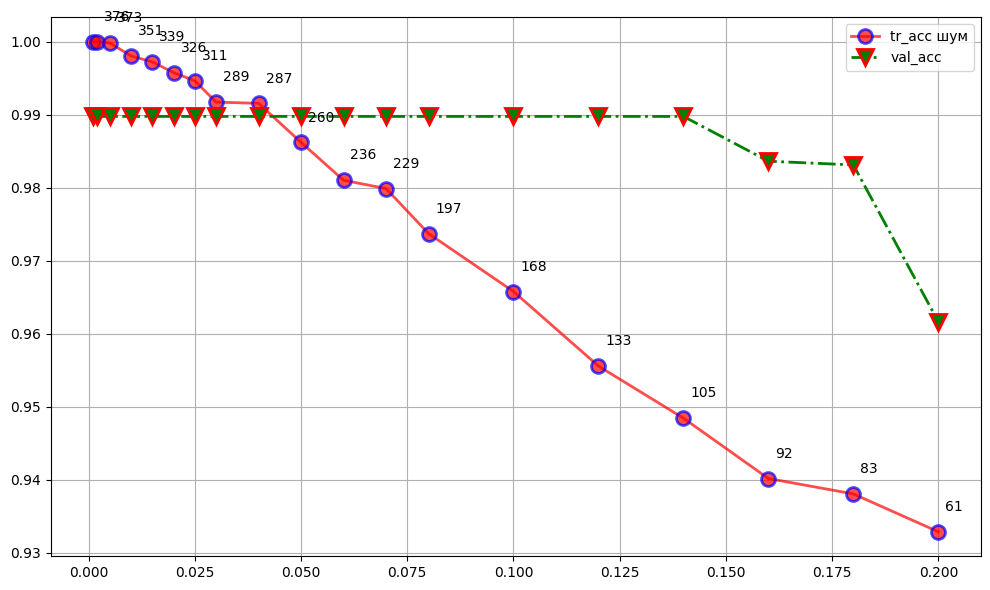

In [43]:
#эксперимент по точности от impMax
imps1w = [0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]

wd_experiment(trainObjects,testObjects,wrong_rate= 0.20,imps = imps1w)

## Random Forest

In [58]:
class RForest:
    def __init__(self, impMax, trees_cnt, bootstrap_size, d_l = None,m = None):
        '''
        d_l - каждое дерево ансамбля учится на подпространстве обучающей выборки. 
              для каждого дерева выбирается случайное подмножество признаков.
              d_l мощьность множества признаков (именно признаков, не включая колонку класса)

        m   - дерево строится на подпространстве признаков.
              для каждого ветвления случайно берём m признаков из подпространства
        '''
        self.impMax = impMax
        self.trees_cnt = trees_cnt
        self.bootstrap_size = bootstrap_size
        self.d_l = d_l
        self.m = m
        self.trees = []

    def classify(self, obj):
        ans = {}
        srt = {}

        for tree in self.trees:
                
            c1 = tree.classify(obj) #вычисленный класс объекта
            if ans.get(c1) != None:
                ans[c1] += 1
            else:
                ans[c1] = 1

        srt  = sorted(ans.items(), key=operator.itemgetter(1))
        (voted_cls, voted_cnt)  = srt[len(srt)-1]
        return voted_cls

    def get_accuracy(self, objects):
        t = 0
        for d in objects:
            c1 = self.classify(d) #вычисленный класс объекта
            c = d[0] #истинный класс объекта
            if c == c1:
                t = t+1
        acc = t/len(objects)
        return acc
    
    def fit(self, objects):
        
        random.seed(42)

        attr_cnt = get_attr_cnt(objects)

        for i in range(self.trees_cnt):

            #для каждого дерева своё подпространство атрибутов размером d_l
            sub_s = []
            if self.d_l is not None:
                # attr_cnt включает в себя 0 (колонку класса)
                # d_l не включает
                sub_s = random.sample(range(1,attr_cnt),self.d_l)
            else:
                sub_s = list(range(1,attr_cnt))
            
            tree = DTree(self.impMax, attrs= sub_s, m= self.m)
            self.trees.append(tree)


        for tree in self.trees:
            if self.bootstrap_size is None:
                objects1 = objects
            else:
                objects1 = []

                for _ in range(self.bootstrap_size):

                    i = random.randint(0,len(objects)-1)

                    objects1.append(objects[i])
                
            tree.trainNode(objects1,"",-1)


In [62]:
sm=[['p', 'k', 'y', 'e', 'f', 'f', 'c', 'n', 'b', 't'],
    ['p', 'f', 'y', 'n', 'f', 'f', 'c', 'n', 'b', 't'], 
    ['e', 'f', 's', 'n', 'f', 'a', 'c', 'b', 'y', 'e'], 
    ['e', 'x', 'f', 'n', 't', 'f', 'c', 'b', 'p', 't'], 
    ['p', 'x', 'y', 'e', 'f', 'f', 'c', 'n', 'b', 't']]

len(sm[0])

10

In [80]:
#потестим на простых примерах
#rf = RForest(impMax=0.1,trees_cnt=1, bootstrap_size=None,d_l=5)
rf = RForest(impMax=0.1,trees_cnt=3, bootstrap_size=None,d_l=5,m=3)
rf.fit(sm)

for tree in rf.trees:
    tree.showModel()
    acc  = tree.getAccuracy(sm)
    print("tree acc {}".format(acc))

acc = rf.get_accuracy(sm)
print("rand forest acc {}".format(acc))

tree:
rule node0 attr:9 value:t childL:1 childR:4
rule node1 attr:2 value:y childL:2 childR:3
leaf node2 class:p
leaf node3 class:e
leaf node4 class:e
tree acc 1.0
tree:
rule node0 attr:3 value:n childL:1 childR:6
rule node1 attr:1 value:f childL:2 childR:5
rule node2 attr:5 value:f childL:3 childR:4
leaf node3 class:p
leaf node4 class:e
leaf node5 class:e
leaf node6 class:p
tree acc 1.0
tree:
rule node0 attr:7 value:n childL:1 childR:2
leaf node1 class:p
leaf node2 class:e
tree acc 1.0
rand forest acc 1.0


In [85]:
#rf = RForest(impMax=0.01,trees_cnt=10, bootstrap_size=5000)
#rf = RForest(impMax=0.02,trees_cnt=12, bootstrap_size=620)
#d_l=21 - предельный случай - полный набор атрибутов
rf = RForest(impMax=0.01,trees_cnt=20, bootstrap_size=2000,d_l=15,m=5)
rf.fit(trainObjects)
rf.trees[0].showModel()

for tree in rf.trees:
    acc  = tree.getAccuracy(testObjects)
    print("tree acc {}".format(acc))
    #tree.showModel()

acc = rf.get_accuracy(testObjects)
print("rand forest acc {}".format(acc))


tree:
rule node0 attr:12 value:k childL:1 childR:4
rule node1 attr:17 value:t childL:2 childR:3
leaf node2 class:e
leaf node3 class:p
rule node4 attr:8 value:b childL:5 childR:6
leaf node5 class:p
rule node6 attr:2 value:f childL:7 childR:24
rule node7 attr:7 value:n childL:8 childR:23
rule node8 attr:12 value:y childL:9 childR:10
leaf node9 class:p
rule node10 attr:1 value:x childL:11 childR:22
rule node11 attr:3 value:g childL:12 childR:15
rule node12 attr:21 value:u childL:13 childR:14
leaf node13 class:e
leaf node14 class:p
rule node15 attr:8 value:u childL:16 childR:17
leaf node16 class:p
rule node17 attr:9 value:t childL:18 childR:19
leaf node18 class:e
rule node19 attr:8 value:p childL:20 childR:21
leaf node20 class:p
leaf node21 class:e
leaf node22 class:e
leaf node23 class:e
rule node24 attr:7 value:n childL:25 childR:38
rule node25 attr:18 value:p childL:26 childR:35
rule node26 attr:1 value:c childL:27 childR:28
leaf node27 class:p
rule node28 attr:19 value:u childL:29 child

In [83]:
rf.classify(testObjects[15]),testObjects[15][0]

('p', 'p')

In [86]:
def rf_imp_max_acc(train, test, imp_max_grid, trees_cnt, bootstrap_size):
    '''
    строим точность на обучении и тесте от impMax 
    при фиксированных trees_cnt, bootstrap_size
    imp_max_grig - сетка по imp_max на которой строим точность
    '''

    train_tree_acc = np.zeros((len(imp_max_grid),trees_cnt),dtype=np.float16)
    leaf_cnt = np.zeros((len(imp_max_grid),trees_cnt),dtype=np.float16)
    train_acc = []
    test_acc = []

    for i,imp in enumerate(imp_max_grid):
        rf = RForest(impMax= imp, trees_cnt= trees_cnt, bootstrap_size=bootstrap_size)
        rf.fit(train)

        for t, tree in enumerate(rf.trees):
            train_tree_acc[i,t]  = tree.getAccuracy(train)
            leaf_cnt[i,t]  = tree.leaf_cnt()

        train_acc.append(rf.get_accuracy(train))
        test_acc.append(rf.get_accuracy(test))

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(imp_max_grid, train_tree_acc.mean(axis=1), 'o-b', alpha=0.7, label="train tree mean", lw=2, mec='r', mew=2, ms=10)

    ax.plot(imp_max_grid, train_acc, 'o-r', alpha=0.7, label="train vote", lw=2, mec='b', mew=2, ms=10)
    ax.plot(imp_max_grid, test_acc, 'v-.g', label="test vote", mec='r', lw=2, mew=2, ms=12)

    for i,imp in enumerate(imp_max_grid): 
        if i>0:
            ax.annotate(round(leaf_cnt[i].mean()), (imp, train_tree_acc[i].mean()), xytext=(5,15), textcoords='offset points')

    ax.fill_between(imp_max_grid, train_tree_acc.mean(axis=1) - train_tree_acc.std(axis=1), train_tree_acc.mean(axis=1) + train_tree_acc.std(axis=1), color='#888888', alpha=0.4)
    ax.fill_between(imp_max_grid, train_tree_acc.min(axis=1), train_tree_acc.max(axis=1), color='#888888', alpha=0.2)
    
    ax.legend(loc='best')
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("max impurancy")
    ax.set_title(f'{trees_cnt=} {bootstrap_size=}')
    ax.grid(visible=True)

    plt.show()

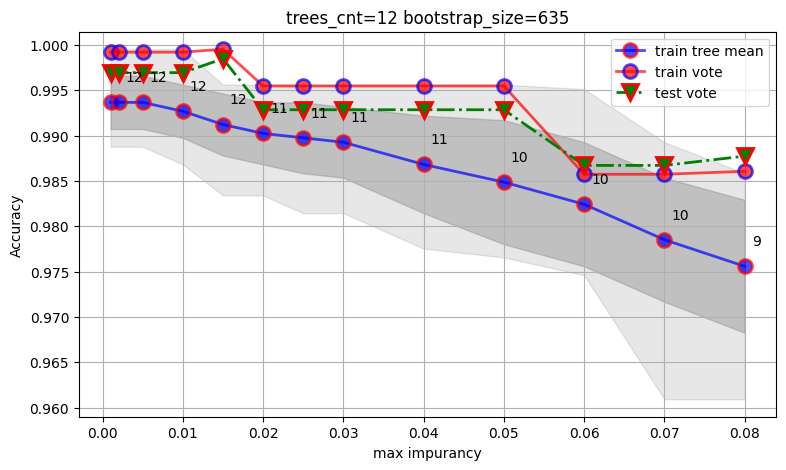

In [87]:
rf_imp_max_acc(trainObjects, testObjects, imp_max_grid=imps1, trees_cnt=12, bootstrap_size=635)

In [90]:
def rf_trees_cnt_acc(
        train, test, trees_cnt_grid, imp_max, bootstrap_size,d_l=None,m=None):
    '''
    строим точность на обучении и тесте от кол-ва деревьев trees_cnt
    при фиксированных imp_max, bootstrap_size, d_l, m
    trees_cnt_grig - сетка по trees_cnt на которой строим точность
    '''

    train_tree_acc_mean = np.zeros((len(trees_cnt_grid),),dtype=np.float16)
    train_tree_acc_min = np.zeros((len(trees_cnt_grid),),dtype=np.float16)
    train_tree_acc_max = np.zeros((len(trees_cnt_grid),),dtype=np.float16)
    train_tree_acc_std = np.zeros((len(trees_cnt_grid),),dtype=np.float16)
    leaf_cnt_mean = [] 
    train_acc = []
    test_acc = []

    for i,cnt in enumerate(trees_cnt_grid):
        rf = RForest(impMax= imp_max, trees_cnt= cnt, bootstrap_size=bootstrap_size,
                     d_l= d_l, m= m
                     )
        rf.fit(train)

        train_tree_acc = np.zeros((cnt,),dtype=np.float16)
        leaf_cnt = np.zeros((cnt,),dtype=np.float16)
        for t, tree in enumerate(rf.trees):
            train_tree_acc[t]  = tree.getAccuracy(train)
            leaf_cnt[t]  = tree.leaf_cnt()

        train_tree_acc_mean[i] = train_tree_acc.mean()
        train_tree_acc_min[i] = train_tree_acc.min()
        train_tree_acc_max[i] = train_tree_acc.max()
        train_tree_acc_std[i] = train_tree_acc.std()
        leaf_cnt_mean.append(round(leaf_cnt.mean()))
        train_acc.append(rf.get_accuracy(train))
        test_acc.append(rf.get_accuracy(test))

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(trees_cnt_grid, train_tree_acc_mean, 'o-b', alpha=0.7, label="train tree mean", lw=2, mec='r', mew=2, ms=10)

    ax.plot(trees_cnt_grid, train_acc, 'o-r', alpha=0.7, label="train vote", lw=2, mec='b', mew=2, ms=10)
    ax.plot(trees_cnt_grid, test_acc, 'v-.g', label="test vote", mec='r', lw=2, mew=2, ms=12)

    for i,imp in enumerate(trees_cnt_grid): 
        if i>0:
            ax.annotate(leaf_cnt_mean[i], (imp, train_tree_acc_mean[i]), xytext=(5,15), textcoords='offset points')

    ax.fill_between(trees_cnt_grid, train_tree_acc_mean - train_tree_acc_std, train_tree_acc_mean + train_tree_acc_std, color='#888888', alpha=0.4)
    ax.fill_between(trees_cnt_grid, train_tree_acc_min, train_tree_acc_max, color='#888888', alpha=0.2)
    
    ax.legend(loc='best')
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("trees count")
    ax.set_xticks(trees_cnt_grid)
    ax.set_title(f'{imp_max=} {bootstrap_size=} {d_l=} {m=}')
    ax.grid(visible=True)

    plt.show()

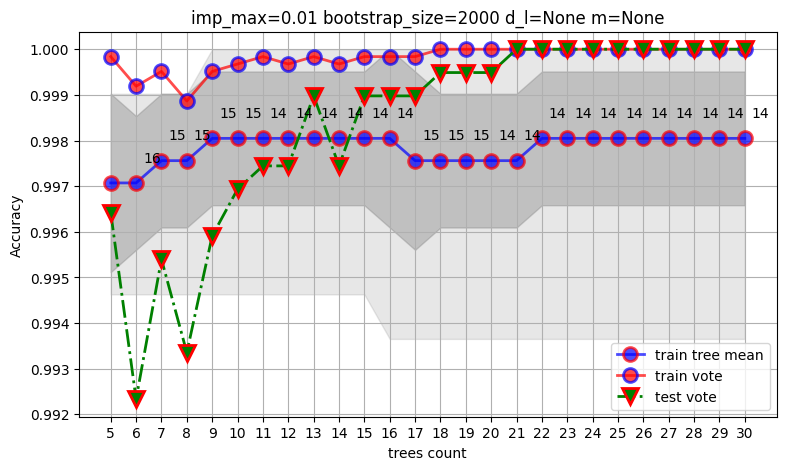

In [ ]:
rf_trees_cnt_acc(
    trainObjects, testObjects, trees_cnt_grid=range(5,31), 
    imp_max=0.01, bootstrap_size=2000)

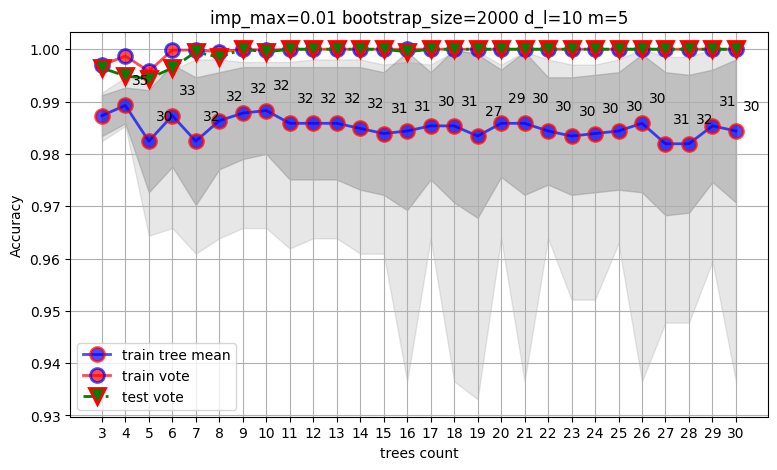

In [94]:
rf_trees_cnt_acc(
    trainObjects, testObjects, trees_cnt_grid=range(3,31), 
    imp_max=0.01, bootstrap_size=2000, d_l=10, m=5)